## Outliers Removing Using IQR Method

In [11]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# load dataset
df = pd.read_csv('../Dataset/placement.csv')

In [13]:
# display the first few rows of the dataframe
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


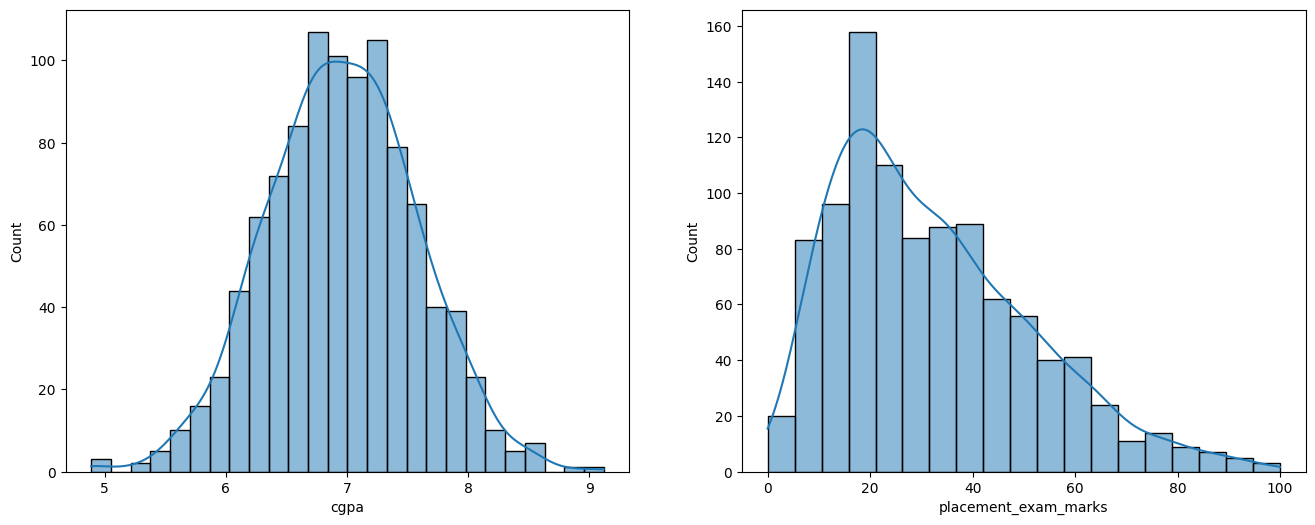

In [14]:
# Visualizing the original distributions
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.show()

In [15]:
# Calculate skewness
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [16]:
# Calculate skewness
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [17]:
# Summary statistics of placement_exam_marks
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

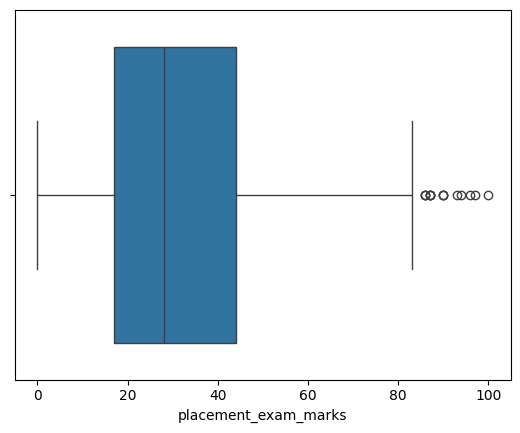

In [18]:
# Boxplot to visualize outliers
sns.boxplot(df['placement_exam_marks'],orient='h')

In [19]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [20]:
percentile25

np.float64(17.0)

In [21]:
percentile75

np.float64(44.0)

In [22]:
# Calculate IQR
iqr = percentile75 - percentile25

In [23]:
iqr

np.float64(27.0)

In [34]:
# Calculate upper and lower limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
# Display the limits
print('upper limit', upper_limit)
print('lower limit', lower_limit)

upper limit 84.5
lower limit -23.5


# finding outliers

In [26]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [27]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# trimming

In [36]:
# Create new dataframe without outliers
new_df = df[df['placement_exam_marks'] < upper_limit]

In [29]:
new_df.shape

(985, 3)

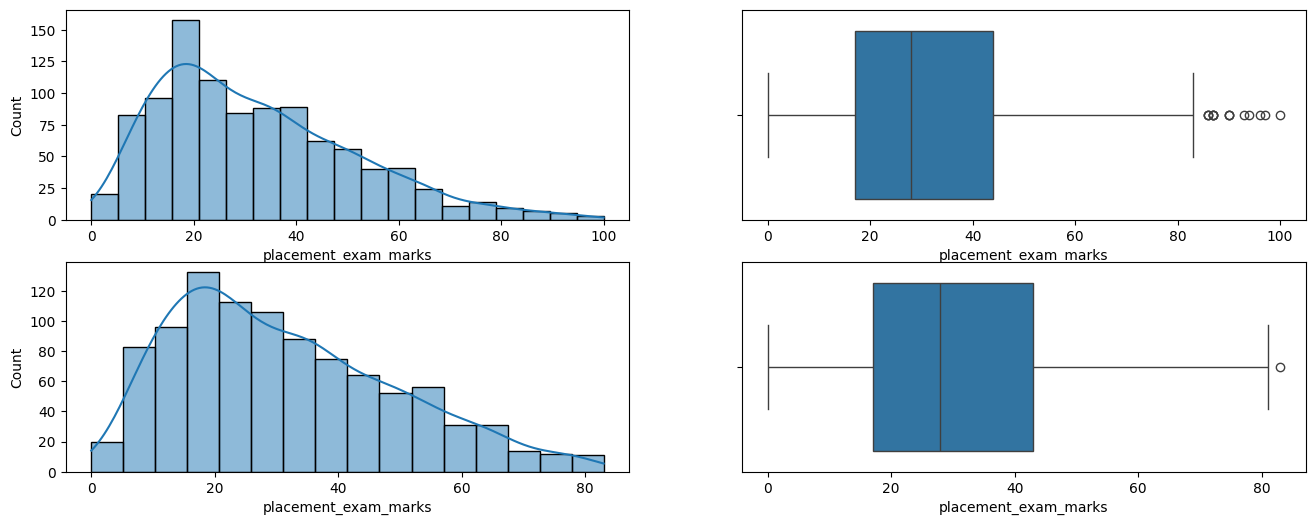

In [30]:
# comparing

plt.figure(figsize=(16,6))
plt.subplot(2,2,1)

sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')
plt.show()

# capping

np.where(condition, true, false)

In [37]:
# Capping the outliers
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [32]:
new_df_cap.shape

(1000, 3)

# comparing

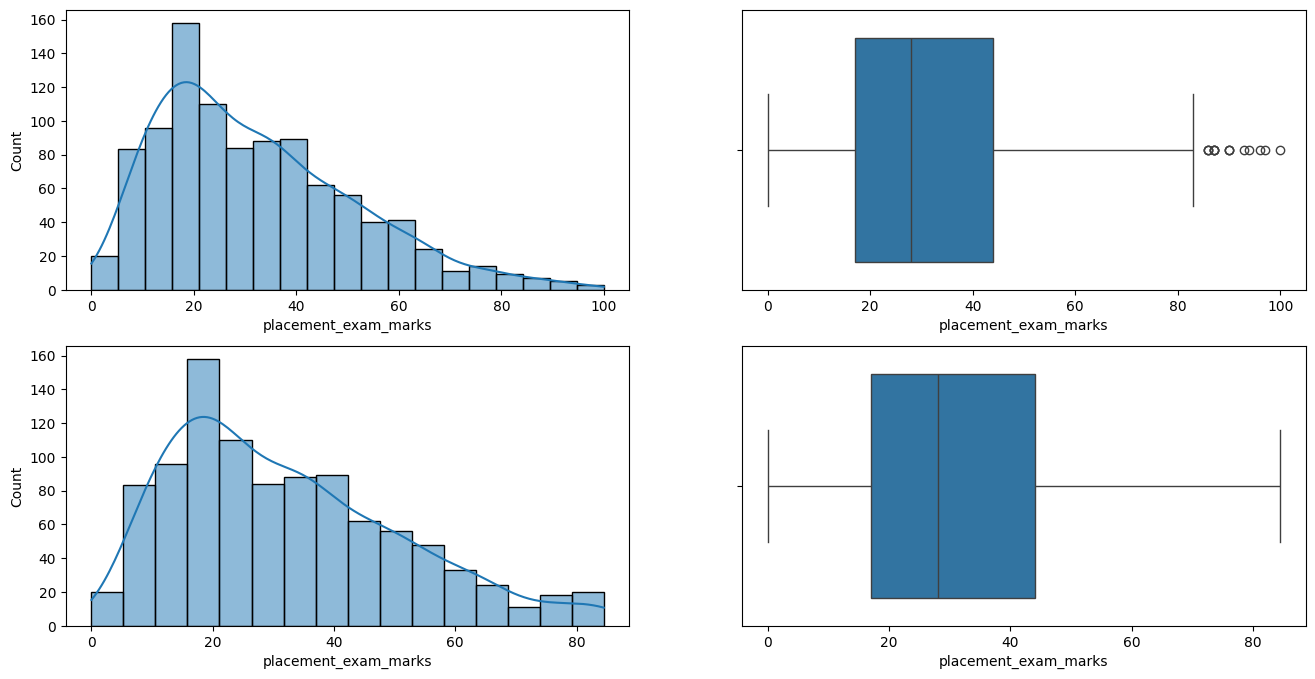

In [38]:
# comparing capped data
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'],orient='h')
plt.show()